In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd '/content/drive/MyDrive/Larkai Assignment/LH_Assignment items/assignment folder'

/content/drive/MyDrive/Larkai Assignment/LH_Assignment items/assignment folder


# Loading necessary libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image


# Visualize sample output

In [8]:
signal = np.load("signal.npy")
signal.shape

(478,)

In [10]:
signal

array([71.  , 71.  , 71.  , 71.  , 56.8 , 43.6 , 41.2 , 35.  , 33.6 ,
       49.2 , 64.4 , 69.  , 77.4 , 80.8 , 81.8 , 76.4 , 65.8 , 52.2 ,
       49.4 , 34.2 , 24.2 , 19.  , 18.4 ,  5.4 ,  4.4 ,  4.  ,  3.8 ,
        1.8 ,  1.8 ,  1.8 ,  2.  ,  2.  ,  2.4 ,  2.6 ,  2.8 ,  2.8 ,
        3.2 ,  3.4 ,  4.2 ,  4.6 ,  5.2 ,  5.6 ,  6.  ,  6.  ,  6.6 ,
        7.  ,  7.6 ,  8.4 ,  9.2 ,  9.8 , 10.6 , 11.6 , 12.6 , 13.6 ,
       15.2 , 16.2 , 17.  , 17.6 , 18.  , 17.8 , 18.2 , 18.4 , 18.6 ,
       18.4 , 18.2 , 17.8 , 17.2 , 16.2 , 15.4 , 14.6 , 15.  , 13.6 ,
       12.4 , 11.4 , 10.2 ,  7.2 ,  6.2 ,  5.4 ,  6.  ,  5.2 ,  5.  ,
        4.8 ,  4.4 ,  2.6 ,  2.4 ,  2.2 ,  2.  ,  2.  ,  2.  ,  2.  ,
        2.  ,  2.  ,  2.  ,  2.2 ,  2.2 ,  2.4 ,  2.6 ,  2.6 ,  2.4 ,
        2.4 ,  2.2 ,  2.2 ,  2.2 ,  2.2 ,  2.2 ,  2.2 ,  2.  ,  2.  ,
        2.  ,  2.2 ,  2.2 ,  2.2 ,  2.2 ,  2.  ,  1.8 ,  1.8 ,  1.8 ,
        2.  ,  2.2 ,  2.2 ,  2.2 ,  2.  ,  1.6 ,  1.4 ,  1.2 ,  1.  ,
        1.  ,  1.  ,

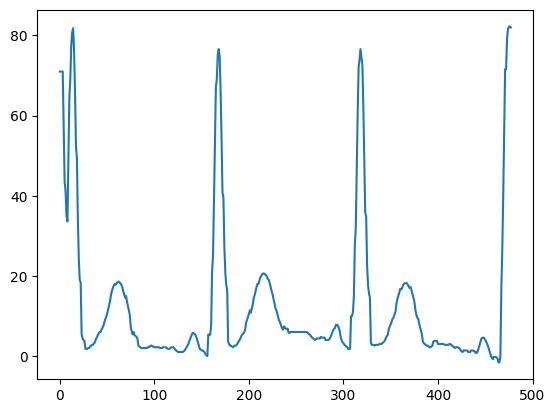

In [9]:
plt.plot(signal)

# Extracting the Signal

### Loading the First Image

In [35]:
img = Image.open('1.jpg')
img = np.array(img)

### Signal Extraction Using Darkest Point Detection

In order to obtain a 1D array representation of the signal, our aim is to traverse every column and obtain the locations of the darkest points in each column. At each column, we first obtain the darkest point, mark it with 0 and mark the remaining points with 1. Then we obtain the index of the darkest point (point with 0 value in the column), check if its at the bottom of the column - if yes, we append the darkest point in the previous column, else we append the current darkest point

In [36]:
points = []
for i in range(img.shape[1]):
    col = []
    for j in range(img.shape[0]):
        if img[j][i] == 0.0:
            col.append(0.0)
        else:
            col.append(1.0)
    min_idx = img.shape[0] - np.argmin(col) # inverting the axes as image axes start from top left corner
    if min_idx == img.shape[0]:
        points.append(points[-1])
    else:
        points.append(min_idx)

### Visualizing the 1D Signal

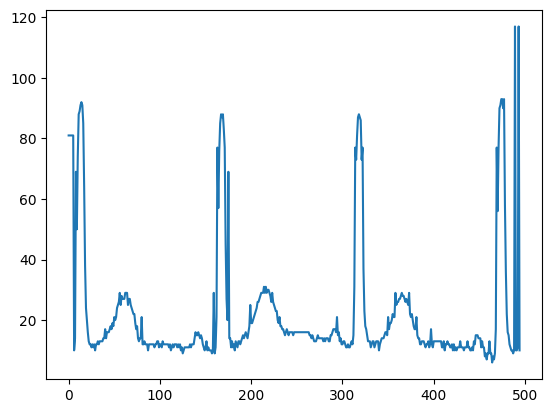

In [37]:
plt.plot(points)

### Wrapping everything into a function for easier usage

In [45]:
def obtain_signal(img):
  points = []
  for i in range(img.shape[1]):
    col = []
    for j in range(img.shape[0]):
        if img[j][i] == 0.0:
            col.append(0.0)
        else:
            col.append(1.0)
    min_idx = img.shape[0] - np.argmin(col) # inverting the axes as image axes start from top left corner
    if min_idx == img.shape[0]:
        points.append(points[-1])
    else:
        points.append(min_idx)
  return points

### Generating the signals for all the files

In [42]:
files = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']

In [48]:
signals = []
for f in files:
  img = np.array(Image.open(f))
  points = obtain_signal(img)
  signals.append(points)

### Saving all the signals in a separate file

In [50]:
root = '/content/drive/MyDrive/Larkai Assignment/LH_Assignment items/assignment folder/Signals/'

In [52]:
for i, s in enumerate(signals):
    path = root + 'signal_' + str(i + 1)
    np.save(path, s)